In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

import random as rnd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Feature Engineering

In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

In [6]:
final_df=pd.concat([train_df,test_df],axis=0,sort = False)

In [7]:
final_df.shape

(1309, 12)

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
final_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
final_df.drop(['PassengerId'],axis=1,inplace=True)
final_df.drop(['Cabin'],axis=1,inplace=True)


In [11]:
final_df.drop(['Ticket'],axis=1,inplace=True)

In [12]:
final_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
final_df['Title'] = final_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
final_df['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object

In [15]:
pd.crosstab(final_df['Title'], final_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [16]:
final_df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Jonkheer      1
Capt          1
Mme           1
Don           1
Countess      1
Sir           1
Lady          1
Dona          1
Name: Title, dtype: int64

In [17]:

final_df['Title'] = final_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

final_df['Title'] = final_df['Title'].replace('Mlle', 'Miss')
final_df['Title'] = final_df['Title'].replace('Ms', 'Miss')
final_df['Title'] = final_df['Title'].replace('Mme', 'Mrs')

In [18]:
final_df['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [19]:
final_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
#title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#final_df['Title'] = final_df['Title'].map(title_mapping)


In [21]:
final_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [22]:
final_df['Title'].isnull().sum()

0

In [23]:
final_df['Embarked']=final_df['Embarked'].fillna(final_df['Embarked'].mode()[0])

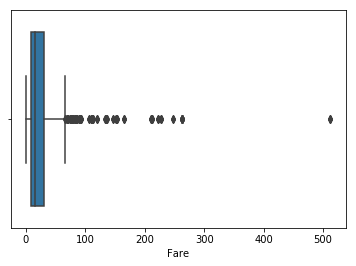

In [24]:
sns.boxplot('Fare' , data = final_df )

In [25]:
final_df['Fare']=final_df['Fare'].fillna(final_df['Fare'].median())

In [26]:
final_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [27]:
final_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [28]:
final_df['Age']=final_df['Age'].fillna(final_df['Age'].median())

In [29]:
final_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [30]:
final_df.drop(['Name'],axis=1,inplace=True)

In [31]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


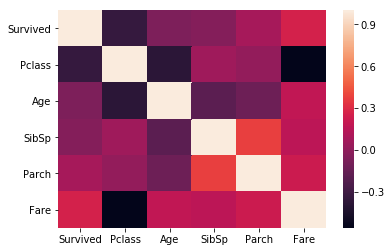

In [33]:
sns.heatmap(final_df.corr())

In [34]:
final_df['Sex'] = final_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [35]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,8.0500,S,Mr


In [36]:
#final_df['AgeBand'] = pd.cut(final_df['Age'], 5)

In [37]:
#final_df['AgeBand'].value_counts()

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int32
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 97.2+ KB


In [39]:
final_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    28.0
409     3.0
410    28.0
411    37.0
412    28.0
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: Age, Length: 1309, dtype: float64

In [40]:
#final_df['AgeBand'].value_counts()

In [41]:
#final_df.loc[ final_df['Age'] <= 16.136, 'Age'] = 0
#final_df.loc[(final_df['Age'] > 16.136) & (final_df['Age'] <= 32.102), 'Age'] = 1
#final_df.loc[(final_df['Age'] > 32.102) & (final_df['Age'] <= 48.068), 'Age'] = 2
#final_df.loc[(final_df['Age'] > 48.068) & (final_df['Age'] <= 64.034), 'Age'] = 3
#final_df.loc[ final_df['Age'] > 64.034, 'Age'] = 4

In [42]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,8.0500,S,Mr


In [43]:
#final_df.drop(['AgeBand'],axis=1,inplace=True)

In [44]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,8.0500,S,Mr


In [45]:
final_df['FamilySize'] = final_df['SibSp'] + final_df['Parch'] + 1

In [46]:
final_df['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [47]:
final_df['IsAlone'] = 0
final_df.loc[final_df['FamilySize'] == 1, 'IsAlone'] = 1

In [48]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0.0,3,0,22.0,1,0,7.2500,S,Mr,2,0
1,1.0,1,1,38.0,1,0,71.2833,C,Mrs,2,0
2,1.0,3,1,26.0,0,0,7.9250,S,Miss,1,1
3,1.0,1,1,35.0,1,0,53.1000,S,Mrs,2,0
4,0.0,3,0,35.0,0,0,8.0500,S,Mr,1,1


In [49]:
final_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.124617,-0.377908,0.060832,0.018322,-0.558683,0.050027,0.147393
Sex,0.543351,-0.124617,1.000000,-0.053663,0.109609,0.213125,0.185681,0.188583,-0.284537
Age,-0.064910,-0.377908,-0.053663,1.000000,-0.189972,-0.125851,0.178182,-0.193742,0.107076
SibSp,-0.035322,0.060832,0.109609,-0.189972,1.000000,0.373587,0.160349,0.861952,-0.591077
Parch,0.081629,0.018322,0.213125,-0.125851,0.373587,1.000000,0.221635,0.792296,-0.549022
Fare,0.257307,-0.558683,0.185681,0.178182,0.160349,0.221635,1.000000,0.226609,-0.275037
FamilySize,0.016639,0.050027,0.188583,-0.193742,0.861952,0.792296,0.226609,1.000000,-0.688864
IsAlone,-0.203367,0.147393,-0.284537,0.107076,-0.591077,-0.549022,-0.275037,-0.688864,1.000000


In [50]:
final_df.shape

(1309, 11)

In [51]:
final_df.drop(['SibSp','Parch','FamilySize'],axis=1,inplace=True)

In [52]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22.0,7.2500,S,Mr,0
1,1.0,1,1,38.0,71.2833,C,Mrs,0
2,1.0,3,1,26.0,7.9250,S,Miss,1
3,1.0,1,1,35.0,53.1000,S,Mrs,0
4,0.0,3,0,35.0,8.0500,S,Mr,1


In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int32
Age         1309 non-null float64
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
IsAlone     1309 non-null int64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 86.9+ KB


In [54]:
final_df['Age'] = final_df['Age'].astype('int')

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int32
Age         1309 non-null int32
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
IsAlone     1309 non-null int64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 81.8+ KB


In [56]:
#final_df['Embarked'] = final_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int32
Age         1309 non-null int32
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
IsAlone     1309 non-null int64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 81.8+ KB


In [58]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22,7.2500,S,Mr,0
1,1.0,1,1,38,71.2833,C,Mrs,0
2,1.0,3,1,26,7.9250,S,Miss,1
3,1.0,1,1,35,53.1000,S,Mrs,0
4,0.0,3,0,35,8.0500,S,Mr,1


In [59]:
#final_df['FareBand'] = pd.qcut(final_df['Fare'], 4)

In [60]:
#final_df['FareBand'].value_counts()

In [61]:
#final_df.loc[ final_df['Fare'] <= 7.896, 'Fare'] = 0
#final_df.loc[(final_df['Fare'] > 7.896) & (final_df['Fare'] <= 14.454), 'Fare'] = 1
#final_df.loc[(final_df['Fare'] > 14.454) & (final_df['Fare'] <= 31.275), 'Fare']   = 2
#final_df.loc[ final_df['Fare'] > 31.275, 'Fare'] = 3
#final_df['Fare'] = final_df['Fare'].astype(int)

In [62]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22,7.2500,S,Mr,0
1,1.0,1,1,38,71.2833,C,Mrs,0
2,1.0,3,1,26,7.9250,S,Miss,1
3,1.0,1,1,35,53.1000,S,Mrs,0
4,0.0,3,0,35,8.0500,S,Mr,1


In [63]:
#final_df.drop(['FareBand'],axis=1,inplace=True)

In [64]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22,7.2500,S,Mr,0
1,1.0,1,1,38,71.2833,C,Mrs,0
2,1.0,3,1,26,7.9250,S,Miss,1
3,1.0,1,1,35,53.1000,S,Mrs,0
4,0.0,3,0,35,8.0500,S,Mr,1


In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int32
Age         1309 non-null int32
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
IsAlone     1309 non-null int64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 81.8+ KB


In [66]:
#final_df['AgeBand'] = final_df['AgeBand'].astype('object')
#final_df['FareBand'] = final_df['FareBand'].astype('object')

In [67]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22,7.2500,S,Mr,0
1,1.0,1,1,38,71.2833,C,Mrs,0
2,1.0,3,1,26,7.9250,S,Miss,1
3,1.0,1,1,35,53.1000,S,Mrs,0
4,0.0,3,0,35,8.0500,S,Mr,1


In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int32
Age         1309 non-null int32
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
IsAlone     1309 non-null int64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 81.8+ KB


In [69]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22,7.2500,S,Mr,0
1,1.0,1,1,38,71.2833,C,Mrs,0
2,1.0,3,1,26,7.9250,S,Miss,1
3,1.0,1,1,35,53.1000,S,Mrs,0
4,0.0,3,0,35,8.0500,S,Mr,1


In [70]:
cat_var = [var for var in final_df.columns if final_df[var].dtypes == 'O']
cat_var

['Embarked', 'Title']

In [71]:
df1=pd.get_dummies(final_df[cat_var],drop_first=True)

In [72]:
df1.head()

,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,0,1,0,0
1,0,0,0,0,1,0
2,0,1,1,0,0,0
3,0,1,0,0,1,0
4,0,1,0,1,0,0


In [73]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22,7.2500,S,Mr,0
1,1.0,1,1,38,71.2833,C,Mrs,0
2,1.0,3,1,26,7.9250,S,Miss,1
3,1.0,1,1,35,53.1000,S,Mrs,0
4,0.0,3,0,35,8.0500,S,Mr,1


In [74]:
#final_df.drop(['Embarked', 'Title', 'AgeBand', 'FareBand'],axis=1,inplace=True)

In [75]:
final_df.drop(['Embarked', 'Title'],axis=1,inplace=True)

In [76]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0.0,3,0,22,7.2500,0
1,1.0,1,1,38,71.2833,0
2,1.0,3,1,26,7.9250,1
3,1.0,1,1,35,53.1000,0
4,0.0,3,0,35,8.0500,1


In [77]:
final_df=pd.concat([final_df,df1],axis=1)

In [78]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,0,22,7.2500,0,0,1,0,1,0,0
1,1.0,1,1,38,71.2833,0,0,0,0,0,1,0
2,1.0,3,1,26,7.9250,1,0,1,1,0,0,0
3,1.0,1,1,35,53.1000,0,0,1,0,0,1,0
4,0.0,3,0,35,8.0500,1,0,1,0,1,0,0


In [79]:
final_df.shape

(1309, 12)

In [80]:
#final_df = final_df.rename(columns = {'AgeBand_(16.136, 32.102]' : 'AgeBand_16.136_32.102', 
                          #'AgeBand_(32.102, 48.068]' : 'AgeBand_32.102_48.068', 
                          #'AgeBand_(48.068, 64.034]' : 'AgeBand_48.068_64.034',
                          #'AgeBand_(64.034, 80.0]' : 'AgeBand_64.034_80.0',
                          #'FareBand_(7.896, 14.454]' : 'FareBand_7.896_14.454',
                           #'FareBand_(14.454, 31.275]' : 'FareBand_14.454_31.275',
                           #'FareBand_(31.275, 512.329]' : 'FareBand_31.275_512.329'
                         #})

In [81]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,0,22,7.2500,0,0,1,0,1,0,0
1,1.0,1,1,38,71.2833,0,0,0,0,0,1,0
2,1.0,3,1,26,7.9250,1,0,1,1,0,0,0
3,1.0,1,1,35,53.1000,0,0,1,0,0,1,0
4,0.0,3,0,35,8.0500,1,0,1,0,1,0,0


In [82]:
#train_test_split

df_Train=final_df.iloc[:891,:]
df_Test=final_df.iloc[891:,:]

In [83]:
df_Train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,0,22,7.2500,0,0,1,0,1,0,0
1,1.0,1,1,38,71.2833,0,0,0,0,0,1,0
2,1.0,3,1,26,7.9250,1,0,1,1,0,0,0
3,1.0,1,1,35,53.1000,0,0,1,0,0,1,0
4,0.0,3,0,35,8.0500,1,0,1,0,1,0,0


In [84]:
df_Train.shape

(891, 12)

In [85]:
df_Test.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,NaN,3,0,34,7.8292,1,1,0,0,1,0,0
1,NaN,3,1,47,7.0000,0,0,1,0,0,1,0
2,NaN,2,0,62,9.6875,1,1,0,0,1,0,0
3,NaN,3,0,27,8.6625,1,0,1,0,1,0,0
4,NaN,3,1,22,12.2875,0,0,1,0,0,1,0


In [86]:
df_Test.shape

(418, 12)

In [87]:
df_Test['Survived'].isnull().sum()

418

In [88]:
X_train=df_Train.drop(['Survived'],axis=1)
y_train=df_Train['Survived']

In [89]:
X_train

,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,22,7.2500,0,0,1,0,1,0,0
1,1,1,38,71.2833,0,0,0,0,0,1,0
2,3,1,26,7.9250,1,0,1,1,0,0,0
3,1,1,35,53.1000,0,0,1,0,0,1,0
4,3,0,35,8.0500,1,0,1,0,1,0,0
5,3,0,28,8.4583,1,1,0,0,1,0,0
6,1,0,54,51.8625,1,0,1,0,1,0,0
7,3,0,2,21.0750,0,0,1,0,0,0,0
8,3,1,27,11.1333,0,0,1,0,0,1,0
9,2,1,14,30.0708,0,0,0,0,0,1,0


In [90]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [91]:
df_Test.drop(['Survived'],axis=1, inplace = True)

C:\Users\sethi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [92]:
df_Test.shape

(418, 11)

In [93]:
#from sklearn.decomposition import PCA

In [94]:
#pca1 = PCA(n_components = 7)
#X_train = pca1.fit_transform(X_train)
#df_Test = pca1.transform(df_Test)

In [95]:
#explained_variance = pca1.explained_variance_ratio_
#print(explained_variance)

In [96]:
df_Test.head()

,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,34,7.8292,1,1,0,0,1,0,0
1,3,1,47,7.0000,0,0,1,0,0,1,0
2,2,0,62,9.6875,1,1,0,0,1,0,0
3,3,0,27,8.6625,1,0,1,0,1,0,0
4,3,1,22,12.2875,0,0,1,0,0,1,0


In [97]:
X_train.shape

(891, 11)

In [100]:
scaled_cols = ['Age','Fare']

In [101]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[scaled_cols] = sc.fit_transform(X_train[scaled_cols])
df_Test[scaled_cols] = sc.transform(df_Test[scaled_cols])

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sethi\Ana

In [102]:
df_Test.head()

,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,0.357450,-0.490783,1,1,0,0,1,0,0
1,3,1,1.355845,-0.507479,0,0,1,0,0,1,0
2,2,0,2.507839,-0.453367,1,1,0,0,1,0,0
3,3,0,-0.180147,-0.474005,1,0,1,0,1,0,0
4,3,1,-0.564145,-0.401017,0,0,1,0,0,1,0


In [104]:
X_train.head()

,Pclass,Sex,Age,Fare,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,-0.564145,-0.502445,0,0,1,0,1,0,0
1,1,1,0.664649,0.786845,0,0,0,0,0,1,0
2,3,1,-0.256947,-0.488854,1,0,1,1,0,0,0
3,1,1,0.434250,0.420730,0,0,1,0,0,1,0
4,3,0,0.434250,-0.486337,1,0,1,0,1,0,0


# Prediction using model

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(df_Test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.03

In [106]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(df_Test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.28

In [107]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(df_Test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.77

In [108]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(df_Test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.11

In [109]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(df_Test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


79.46

In [110]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(df_Test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.7

In [111]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(df_Test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.79

In [112]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(df_Test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.2

In [113]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(df_Test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


97.42

In [114]:
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(X_train,y_train)
y_pred_xgb=classifier.predict(df_Test)
acc_classifier = round(classifier.score(X_train, y_train) * 100, 2)
acc_classifier

88.44

# Random forest

In [118]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid = {
    'n_estimators' : [90,100,110,120],
    'max_depth' : [5],
    'min_samples_split' : [5,6,7,8,9],
    'min_samples_leaf' : [2],
    'max_leaf_nodes'  : [25,26,27,28,29]
             }

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [90, 100, 110, 120], 'max_depth': [5], 'min_samples_split': [5, 6, 7, 8, 9], 'min_samples_leaf': [2], 'max_leaf_nodes': [25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [139]:
grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 27,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 100}

In [140]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=27,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [141]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=27,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
rf.fit(X_train, y_train)
y_pred_RF = rf.predict(df_Test)
rf.score(X_train, y_train)
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
acc_random_forest

85.86

# # XGBoost

In [ ]:
X_train

In [ ]:
X_train = X_train.rename(columns = {'AgeBand_(16.136, 32.102]' : 'AgeBand_16.136_32.102', 
                          'AgeBand_(32.102, 48.068]' : 'AgeBand_32.102_48.068', 
                          'AgeBand_(48.068, 64.034]' : 'AgeBand_48.068_64.034',
                          'AgeBand_(64.034, 80.0]' : 'AgeBand_64.034_80.0',
                          'FareBand_(7.896, 14.454]' : 'FareBand_7.896_14.454',
                           'FareBand_(14.454, 31.275]' : 'FareBand_14.454_31.275',
                           'FareBand_(31.275, 512.329]' : 'FareBand_31.275_512.329'
                         })


In [ ]:
X_train

In [ ]:
df_Test

In [ ]:
df_Test = df_Test.rename(columns = {'AgeBand_(16.136, 32.102]' : 'AgeBand_(16.136_32.102]', 
                          'AgeBand_(32.102, 48.068]' : 'AgeBand_(32.102_48.068]', 
                          'AgeBand_(48.068, 64.034]' : 'AgeBand_(48.068_64.034]',
                          'AgeBand_(64.034, 80.0]' : 'AgeBand_(64.034_80.0]',
                          'FareBand_(7.896, 14.454]' : 'FareBand_(7.896_14.454]',
                           'FareBand_(14.454, 31.275]' : 'FareBand_(14.454_31.275]',
                           'FareBand_(31.275, 512.329]' : 'FareBand_(31.275_512.329]'
                         })


In [ ]:
X_train.head()

In [ ]:
df_Test.head()

In [150]:
import xgboost
classifier=xgboost.XGBClassifier()



In [160]:
#Hyper Parameter Tuning
n_estimators = [500,520,540]
max_depth = [6,7,8,9]
subsample=[0.5]
learning_rate=[0.11,0.12,0.13]
min_child_weight =  [4,5,6]
colsample_bytree = [0.5]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'subsample':subsample,
    'min_child_weight': min_child_weight,
    'colsample_bytree' : colsample_bytree
    }

grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 520, 540], 'max_depth': [6, 7, 8, 9], 'learning_rate': [0.11, 0.12, 0.13], 'subsample': [0.5], 'min_child_weight': [4, 5, 6], 'colsample_bytree': [0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [161]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.12,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 520,
 'subsample': 0.5}

In [163]:
best_grid = grid_search.best_estimator_
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.12, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=520, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

In [166]:
import xgboost
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.12, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_estimators=520, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)

classifier.fit(X_train,y_train)
y_pred_xgb=classifier.predict(df_Test)
acc_classifier = round(classifier.score(X_train, y_train) * 100, 2)
acc_classifier

89.56

# Kcross Validation

In [167]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.8339666326183179
0.03686680388106431


In [144]:
len(y_pred_RF)

418

In [168]:
pred=pd.DataFrame(y_pred_xgb)
Id_df=pd.read_csv('gender_submission.csv')

In [169]:
pred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,0.0
6,0.0
7,0.0
8,1.0
9,0.0


In [170]:
final_sub=pd.concat([Id_df['PassengerId'],pred],axis=1)
final_sub.columns=['PassengerId','Survived']
final_sub['Survived'] = final_sub['Survived'].astype(int)

In [171]:
final_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [172]:
final_sub.to_csv('submission_XGB.csv',index=False)